# Example of upper limit computation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import pltdist, plotfitresult, plotlimit

import zfit
from zfit.loss import ExtendedUnbinnedNLL
from zfit.minimize import Minuit

from hepstats.hypotests.calculators import FrequentistCalculator
from hepstats.hypotests import UpperLimit
from hepstats.hypotests.parameters import POI, POIarray

/Users/matthieumarinangeli/anaconda3/envs/tfn/lib/python3.7/site-packages/zfit-0.1.dev1243+g3358391.d20191114-py3.7.egg/zfit/util/execution.py:61: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [2]:
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['font.size'] = 16

### Fit of a Gaussian signal over an exponential background:

In [3]:
bounds = (0.1, 3.0)

# Data and signal

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 300)
peak = np.random.normal(1.2, 0.1, 10)
data = np.concatenate((data,peak))
data = data[(data > bounds[0]) & (data < bounds[1])]

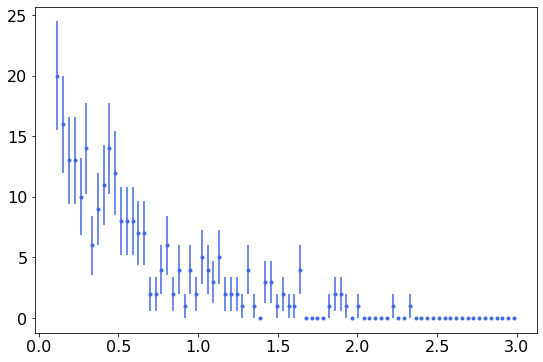

In [4]:
pltdist(data, bins=80, bounds=bounds)

In [5]:
obs = zfit.Space('x', limits=bounds)

In [6]:
lambda_ = zfit.Parameter("lambda",-2.0, -4.0, -1.0)
Nsig = zfit.Parameter("Nsig", 1., -20., len(data))
Nbkg = zfit.Parameter("Nbkg", len(data), 0., len(data)*1.1)

In [7]:
signal = Nsig * zfit.pdf.Gauss(obs=obs, mu=1.2, sigma=0.1)
background =  Nbkg * zfit.pdf.Exponential(obs=obs, lambda_=lambda_)
tot_model = signal + background

In [8]:
# Create the negative log likelihood
data_ = zfit.data.Data.from_numpy(obs=obs, array=data)
nll = ExtendedUnbinnedNLL(model=tot_model, data=data_) 

In [9]:
# Instantiate a minuit minimizer
minimizer = Minuit()

In [10]:
# minimisation of the loss function
minimum = minimizer.minimize(loss=nll)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


FCN = -1077.4737271489062 
 TOTAL NCALL = 66 
 NCALLS = 66 
 
 
 EDM = 4.8784296721449974e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,Nbkg,251.591,16.6534,,,0,281.6,No
1,Nsig,4.51778,5.75076,,,-20,256,No
2,lambda,-1.93036,0.139642,,,-4,-1,No


Text(0, 0.5, 'number of events')

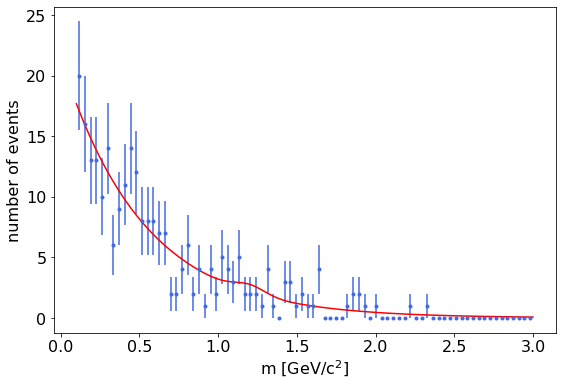

In [11]:
nbins = 80
pltdist(data, nbins, bounds)
plotfitresult(tot_model, bounds, nbins, data)
plt.xlabel("m [GeV/c$^2$]")
plt.ylabel("number of events")

### Upper limit:

Since the signal yield Nsig = $4.5 \pm 5.8$  is consistent with zero signal we compute the CLs upper limit at 95% confidence level on Nsig.

In [12]:
# instantation of the calculator
#calculator = FrequentistCalculator(nll, minimizer, ntoysnull=5000, ntoysalt=5000)
calculator = FrequentistCalculator.from_yaml("upperlimit_freq_zfit_toys.yml", nll, minimizer, ntoysnull=5000, ntoysalt=5000)
calculator.bestfit = minimum #optionnal

In [13]:
# parameter of interest of the null hypothesis
poinull = POIarray(Nsig, np.linspace(0.0, 25, 15))
# parameter of interest of the alternative hypothesis
poialt = POI(Nsig, 0.)

In [14]:
# instantation of the discovery test
ul = UpperLimit(calculator, poinull, poialt)

In [16]:
ul.upperlimit(alpha=0.05, CLs=True);


Observed upper limit: Nsig = 15.646600632692028
Expected upper limit: Nsig = 11.737607819685163
Expected upper limit +1 sigma: Nsig = 15.869701213541024
Expected upper limit -1 sigma: Nsig = 7.8586155137942235
Expected upper limit +2 sigma: Nsig = 22.075403674690378
Expected upper limit -2 sigma: Nsig = 6.182277302035355


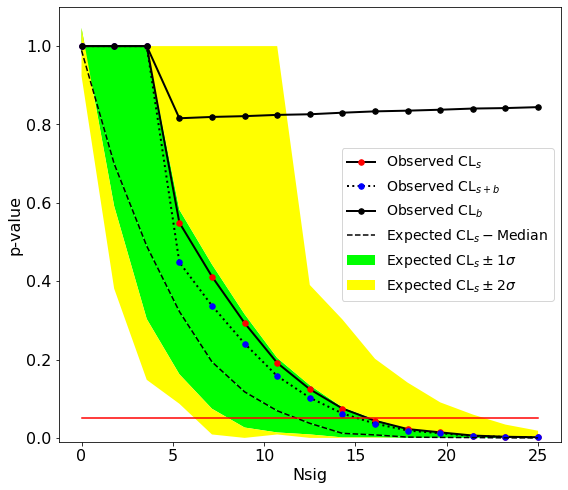

In [17]:
f = plt.figure(figsize=(9, 8))
plotlimit(poinull.values, ul.pvalues(CLs=True), alpha=0.05, CLs=True)
plt.xlabel("Nsig");

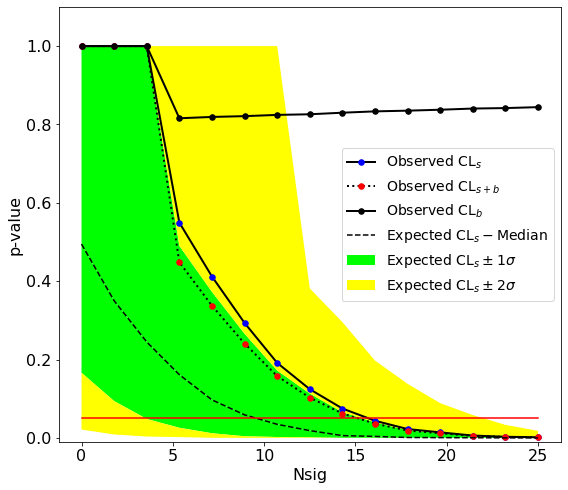

In [18]:
f = plt.figure(figsize=(9, 8))
ax = plotlimit(poinull.values, ul.pvalues(CLs=False), alpha=0.05, CLs=False)
plt.xlabel("Nsig");

In [19]:
ul_qtilde = UpperLimit(calculator, poinull, poialt, qtilde=True)

In [20]:
ul_qtilde.upperlimit(alpha=0.05, CLs=True);


Observed upper limit: Nsig = 16.72341360303421
Expected upper limit: Nsig = 11.72795616746848
Expected upper limit +1 sigma: Nsig = 15.869701213541024
Expected upper limit -1 sigma: Nsig = 7.789897437690264
Expected upper limit +2 sigma: Nsig = 22.075403674690378
Expected upper limit -2 sigma: Nsig = 6.248694298267436


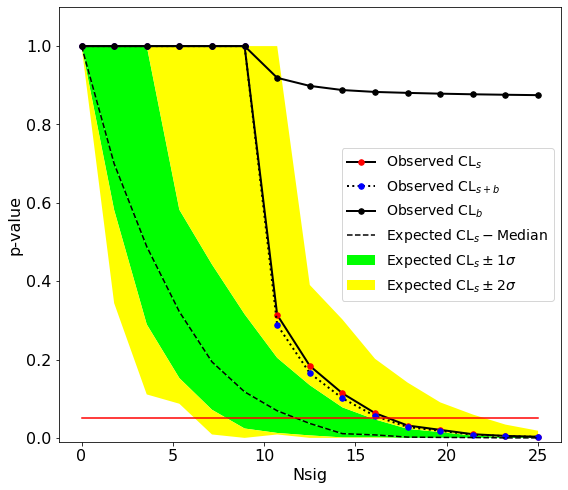

In [21]:
f = plt.figure(figsize=(9, 8))
plotlimit(poinull.values, ul_qtilde.pvalues(CLs=True), alpha=0.05, CLs=True)
plt.xlabel("Nsig");